In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.graphics import utils
from statsmodels.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

In [2]:
allData = pd.read_csv('playlist_data.csv', index_col=0)

In [154]:
allData.columns

Index(['explicit', 'followers', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'mean_artists_followers', 'mean_artists_popularity', 'category_Chill', 'category_Decades', 'category_Dinner', 'category_Electronic/Dance', 'category_Focus', 'category_Hip-Hop', 'category_Indie', 'category_Jazz', 'category_Metal', 'category_Mood', 'category_Party', 'category_Pop', 'category_R&B', 'category_Rock', 'category_Romance', 'category_Sleep', 'category_Soul', 'category_Top Lists', 'category_Trending', 'category_Workout', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'time_signature_0.0', 'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0'], dtype='object')

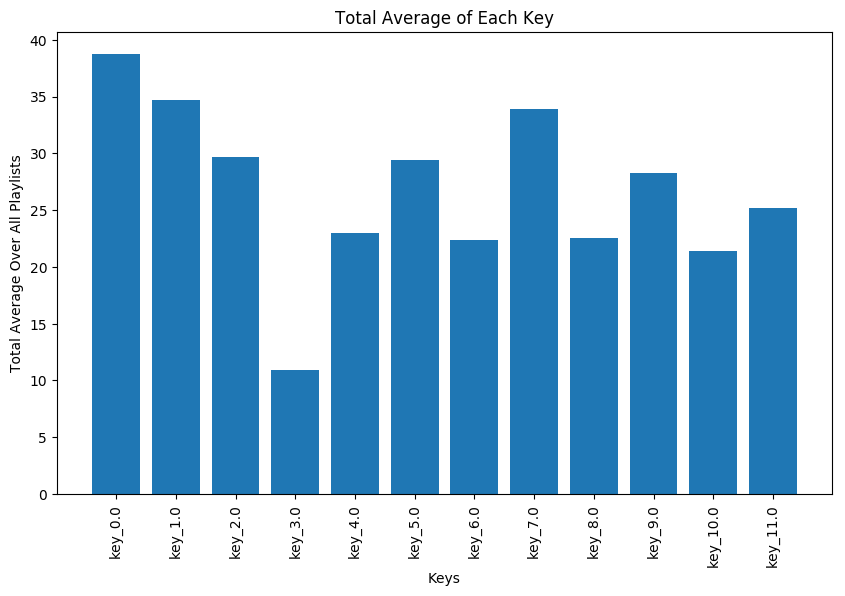

In [149]:
keys = ['key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0']
sns.reset_defaults()
plt.figure(figsize=(10, 6))
x = np.arange(len(keys))
plt.bar(x, height= [sum(allData[x]) for x in keys])
plt.xticks(x, keys, rotation = 'vertical')
plt.xlabel('Keys')
plt.ylabel('Total Average Over All Playlists')
plt.title('Total Average of Each Key')
plt.show()

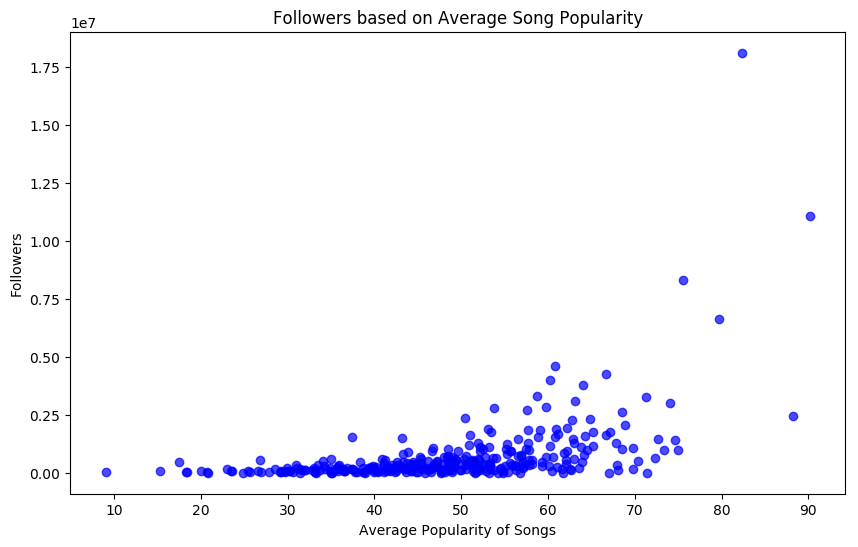

In [50]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(allData['popularity'].values,allData['followers'].values, marker='o', linestyle='None', alpha = .7, color = 'blue')
plt.xlabel('Average Popularity of Songs')
plt.ylabel('Followers')
plt.title('Followers based on Average Song Popularity')
plt.show()

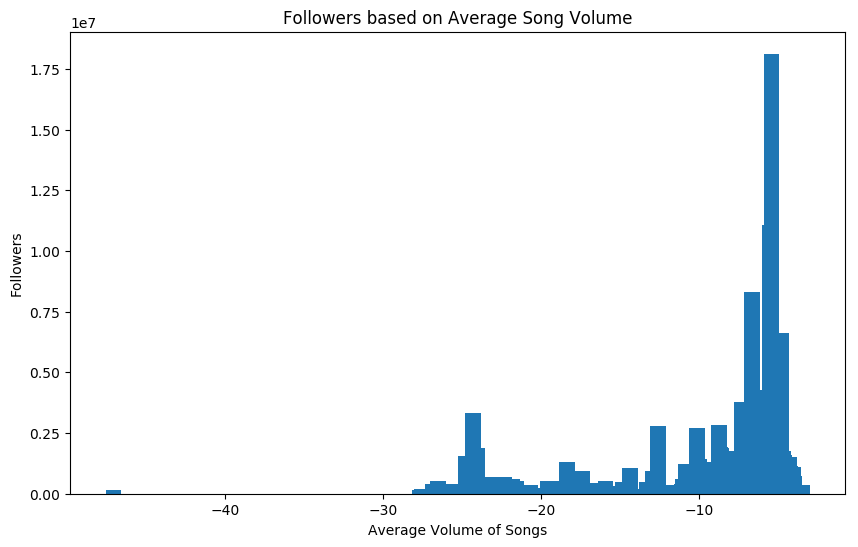

In [100]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.bar(allData['loudness'].values,allData['followers'].values, width = 1)
plt.xlabel('Average Volume of Songs')
plt.ylabel('Followers')
plt.title('Followers based on Average Song Volume')
plt.show()

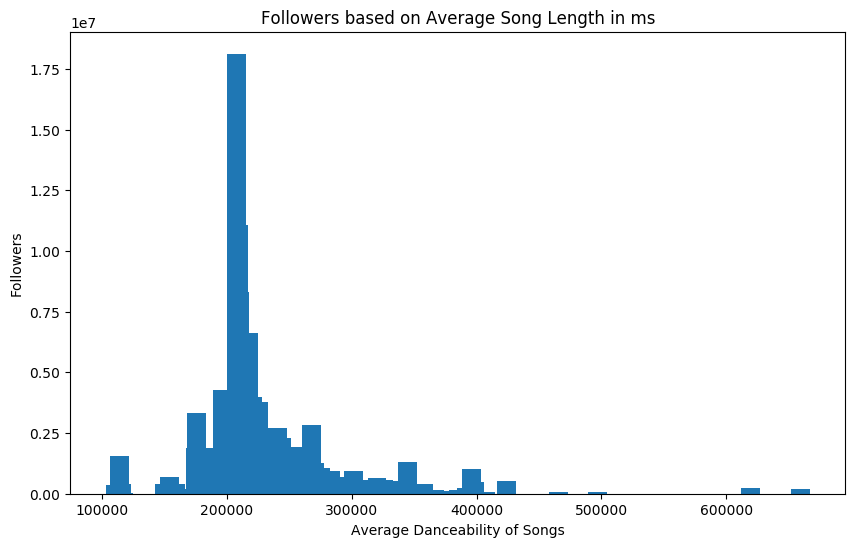

In [97]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.bar(allData['duration_ms'].values,allData['followers'].values, width = 15000)
plt.xlabel('Average Danceability of Songs')
plt.ylabel('Followers')
plt.title('Followers based on Average Song Length in ms')
plt.show()

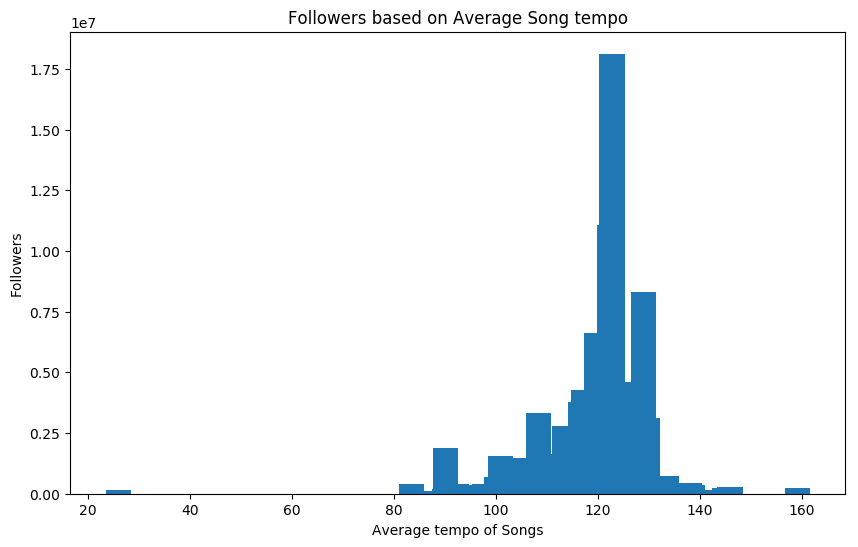

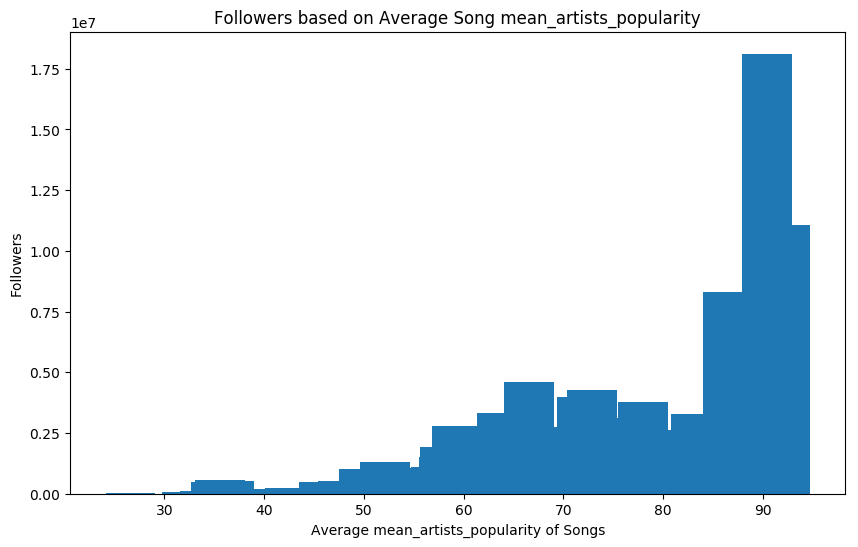

In [118]:
for predictor in ['tempo','mean_artists_popularity']:
    sns.reset_defaults()
    plt.figure(figsize=(10, 6))
    plt.bar(allData[predictor].values,allData['followers'].values, width = 5)
    plt.xlabel('Average ' + predictor + ' of Songs')
    plt.ylabel('Followers')
    plt.title('Followers based on Average Song ' + predictor)
    plt.show()

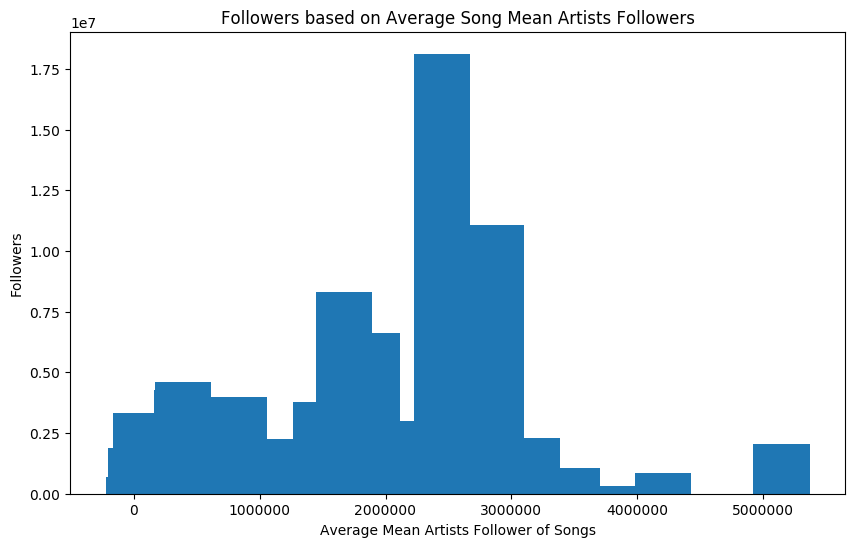

In [115]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.bar(allData['mean_artists_followers'].values,allData['followers'].values, width = 450000)
plt.xlabel('Average Mean Artists Follower of Songs')
plt.ylabel('Followers')
plt.title('Followers based on Average Song Mean Artists Followers')
plt.show()

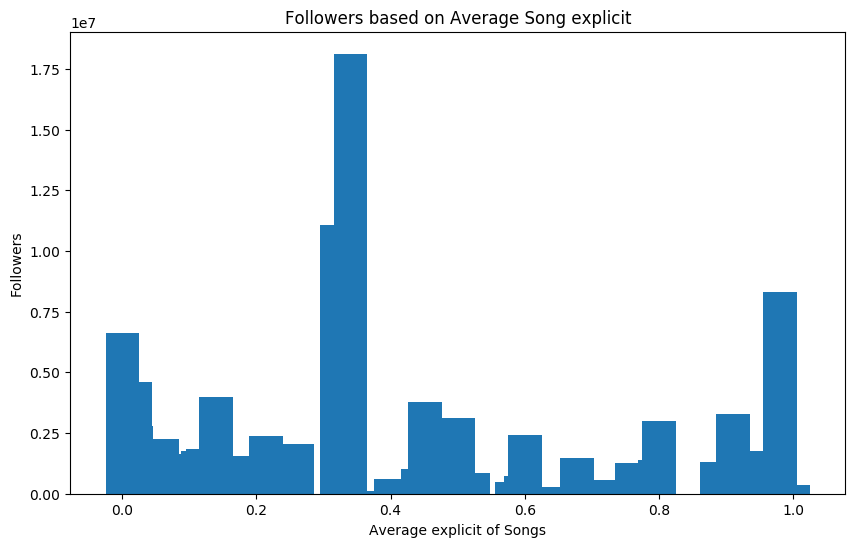

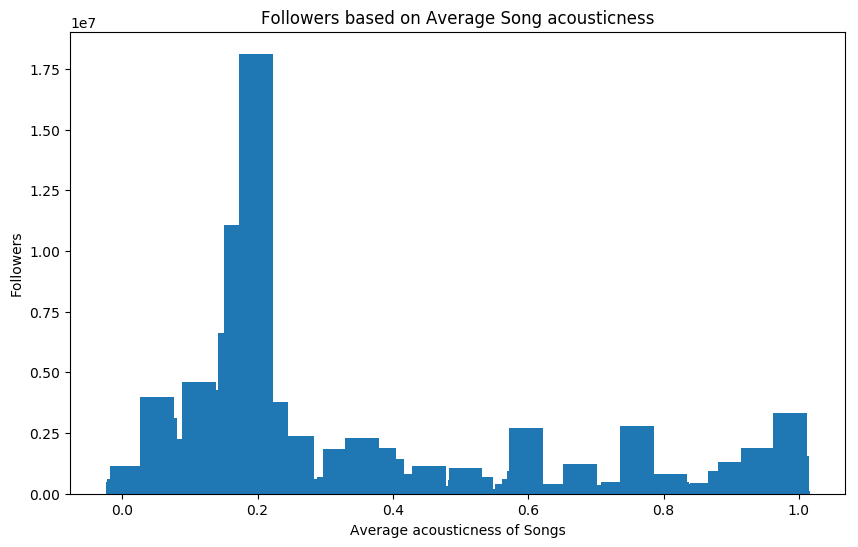

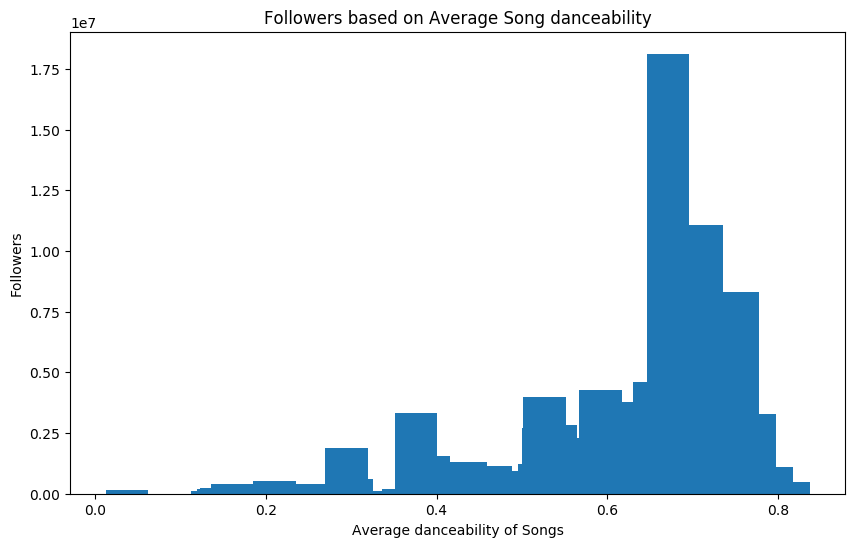

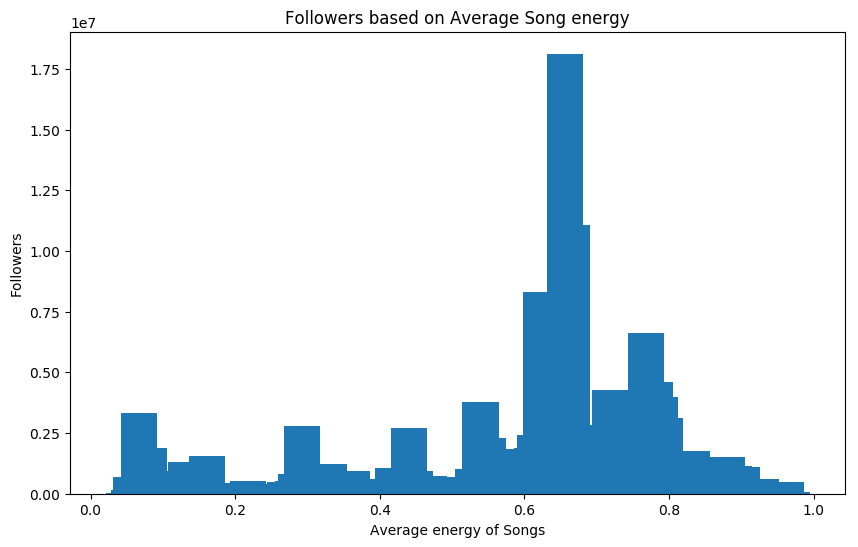

In [119]:
predictors = ['explicit', 'acousticness', 'danceability', 'energy']
for predictor in predictors:
    sns.reset_defaults()
    plt.figure(figsize=(10, 6))
    plt.bar(allData[predictor].values,allData['followers'].values, width = .05)
    plt.xlabel('Average ' + predictor + ' of Songs')
    plt.ylabel('Followers')
    plt.title('Followers based on Average Song ' + predictor)
    plt.show()

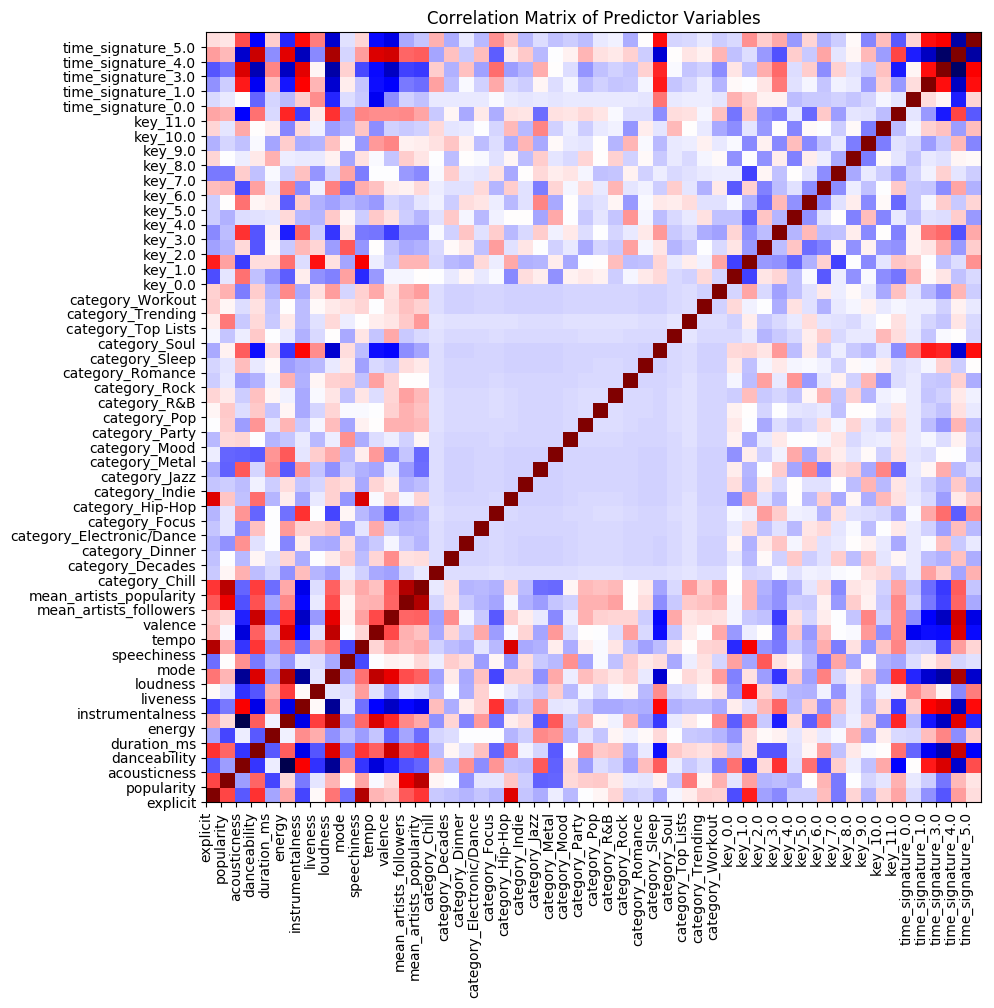

In [90]:
sns.reset_defaults()
# names = np.delete(np.array(allData.columns), 1)
names = list(allData.columns)
names.remove('followers')
plt.figure(figsize= (10,10))
cor_matrix = np.corrcoef(np.array(allData[names]).T)
plt.pcolor(cor_matrix, cmap = 'seismic', linewidth = 1)
plt.xticks(range(len(names)), names, rotation = 'vertical')
plt.yticks(range(len(names)), names, rotation = 'horizontal')
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

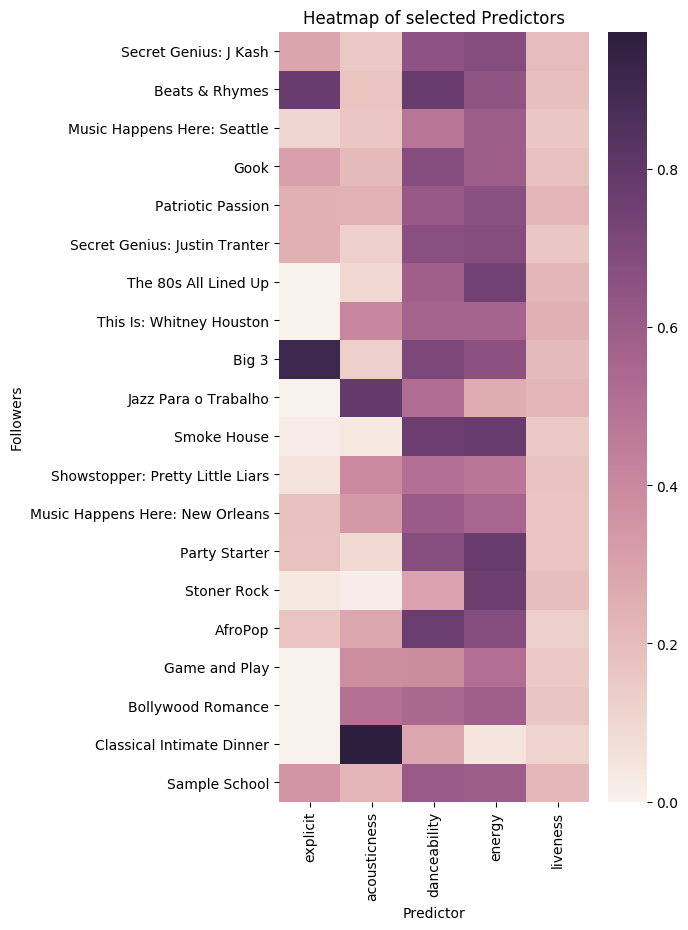

In [167]:
plt.figure(figsize=  (5,10))
sns.heatmap(allData.sort_values('followers')[['explicit', 'acousticness', 'danceability', 'energy', 'liveness']][:20])
# plt.yticks(range(len(allData)),np.append(allData['followers'][data_train['Cancer_type'] == 1].values, data_train['Cancer_type'][data_train['Cancer_type'] == 0].values))
plt.ylabel('Followers')
plt.xlabel('Predictor')
plt.title('Heatmap of selected Predictors')
plt.show()